In [9]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import csv
import os
from repast4py import parameters

params = parameters.init_params("model1.yaml", "")

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

/Users/federico.bindi/anaconda3/envs/collaborazione_terna/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Current folders are:
fb_output.0


In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

In [3]:
#names=["inv goods bought", "inv goods inventories", "grossInvestments","grossInvExpected"]
names= [' '] * len(params['investmentGoods'])
for i in range(len(params['investmentGoods'])):
    names[i] = "inv goods bought type "+str(params['investmentGoods'][i])

names.append("inv goods inventories")
names.append("grossInvestments")
names.append("grossInvExpected")

In [8]:
names

['inv goods bought type 1',
 'inv goods inventories',
 'grossInvestments',
 'grossInvExpected']

In [4]:
os.chdir("../"+folder+".0")
#planner info database from rank==0
plannerInfo=pd.read_csv('plannerInfo.csv', header=None)
#print(plannerInfo)
#planner info database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    plannerInfo=plannerInfo.add(pd.read_csv('plannerInfo.csv', header=None))
plannerInfo.columns=names
#pd.DataFrame(plannerInfo)

ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [9]:
plannerInfo

,0,1,2,3,4
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,2018.020836,2384.425000,0.000000,0.000000,0.000000e+00
3,5906.655020,6760.324998,0.000000,0.000000,0.000000e+00
4,14158.566560,16492.338033,0.000000,0.000000,0.000000e+00
5,19216.621327,22571.847863,0.000000,0.000000,2.212511e+05
6,16246.942832,18732.750147,1680.561618,19216.621327,4.531238e+05
7,18552.500710,21654.197592,1420.852712,16246.942832,6.631418e+05
8,18762.783783,21396.782994,1622.481917,18552.500710,8.770087e+05
9,12020.006566,13647.547822,1640.871917,18762.783783,1.073665e+06


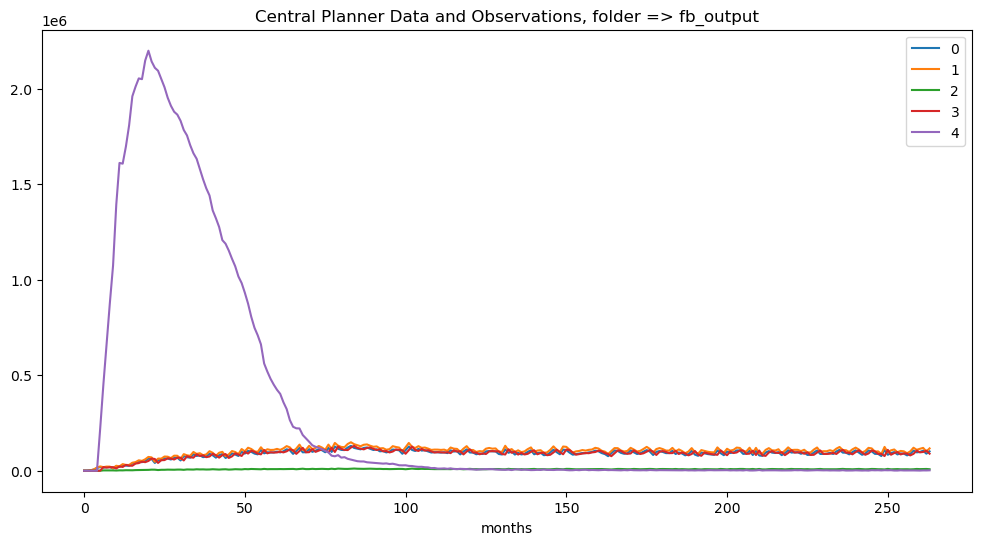

In [10]:
fig=plannerInfo.plot(figsize=(12,6), title="Central Planner Data and Observations, folder => " + folder,\
                     xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlot.jpg",dpi=180)


In [11]:
namesInvGoods= [' '] * len(params['investmentGoods'])
for i in range(len(params['investmentGoods'])):
    namesInvGoods[i] = "inv goods bought type "+str(params['investmentGoods'][i])
print(namesInvGoods)
    
fig=plannerInfo[namesInvGoods].plot(figsize=(12,6), \
        title="Central Planner Data and Observations [inv goods bought], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)

['inv goods bought type 1']


KeyError: "None of [Index(['inv goods bought type 1'], dtype='object')] are in the [columns]"

In [12]:
fig=plannerInfo[names].plot(figsize=(12,6), \
        title="Central Planner Data and Observations, excluding [grossInvExpected (value)], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)

KeyError: "None of [Index(['inv goods bought type 1', 'inv goods inventories', 'grossInvestments',\n       'grossInvExpected'],\n      dtype='object')] are in the [columns]"